# Heart Attack Possibility, an Exploratory Data Analysis 

## Import data and relevant visualisation packages

In [1]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import json, ast

%matplotlib inline

In [5]:
df_heart = pd.read_csv("heart.csv")

## Data information

In [6]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df_heart.shape

(303, 14)

The dataset consists of 14 columns and 303 rows. This means the information of 303 heart attack patients is in the dataset and 14 different variables (or attributes) are considered. 

Let's familiarise ourselves with the attribute information:

- age : age of the patient, numerical variable

- sex : sex of the patient (0=female , 1=male) categorical variable

- cp : chest pain type (values 1,2,3,4,) categorical variable

- trestbps : resting blood pressure, numerical variable

- chol : serum cholestoral in mg/dl, numerical variable

- fbs : fasting blood sugar > 120 mg/dl, numerical variable

- restecg : resting electrocardiographic results (values 0,1,2), categorical variable

- thalach : maximum heart rate achieved, numerical variable

- exang : exercise induced angina (0=False, 1=True), categorical variable

- oldpeak : oldpeak = short term depression induced by exercise relative to rest, numerical variable

- slope : the slope of the peak exercise short term segment, numerical variable

- ca : number of major vessels (0-3) colored by flourosopy, discrete numerical variable

- thal : thalassemia, a blood disorder (0=normal; 1=fixed defect; 2=reversable defect) categorical variable

- target : heart disease (0=no 1=yes) categorical variable


## Data Story and Aim of the Analysis

The aim of this analysis is to explore which health attributes are linked to heart attacks. If we can identify what symptoms are linked to heart attacks, healthcare providers can use this information to pre-emptively prevent heart attacks from occuring, and thus reducing the number of deaths caused by heart attacks. The dataset gives a number of variables along with a target condition of having or not having heart diseas. Heart disease is one of the leading killers in the USA and the world, so a thorough study conditions linked to heart disease is both relevant and useful in the world today.  

When researching the causes of heart disease, risk factors generally include high cholesterol, high blood pressure, diabetes, weight and smoking. These are factors that can be changed through making different lifestyle choices. owever, some factors contributing to heart disease that cannot be changed is your family history, increasing age, heredity and male gender. Thalassemia, one of the varaibles in the dataset, is heredity. Not all of the risk factors mentioned are going to be studied in this analysis. But, it I am hypothesizing that older, male patients with high blood pressure, cholesteral and thalassemia have higher chances of having heart disease than most other patients, and that we'll see these factors standing out as significant contributions to heart disease. 

## Data Cleaning

Let's make the column names easier to understand. 

In [10]:
df_heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [12]:
df_heart.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Let's change the values of categorical data to simplify interpretation.

In [53]:
#sex
df_heart['sex'][df_heart['sex'] == 0] = 'female'
df_heart['sex'][df_heart['sex'] == 1] = 'male'

#chest_pain_type
df_heart['chest_pain_type'][df_heart['chest_pain_type'] == 0] = 'no chest pain'
df_heart['chest_pain_type'][df_heart['chest_pain_type'] == 1] = 'typical angina'
df_heart['chest_pain_type'][df_heart['chest_pain_type'] == 2] = 'atypical angina'
df_heart['chest_pain_type'][df_heart['chest_pain_type'] == 3] = 'non-anginal pain'
df_heart['chest_pain_type'][df_heart['chest_pain_type'] == 4] = 'asymptomatic'

#fasting_blood_sugar
df_heart['fasting_blood_sugar'][df_heart['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df_heart['fasting_blood_sugar'][df_heart['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

#rest_ecg
df_heart['rest_ecg'][df_heart['rest_ecg'] == 0] = 'normal'
df_heart['rest_ecg'][df_heart['rest_ecg'] == 1] = 'ST-T wave abnormality'
df_heart['rest_ecg'][df_heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

#exercise_induced_angina
df_heart['exercise_induced_angina'][df_heart['exercise_induced_angina'] == 0] = 'no'
df_heart['exercise_induced_angina'][df_heart['exercise_induced_angina'] == 1] = 'yes'

#st_slope
df_heart['st_slope'][df_heart['st_slope'] == 0] = 'no slope'
df_heart['st_slope'][df_heart['st_slope'] == 1] = 'upsloping'
df_heart['st_slope'][df_heart['st_slope'] == 2] = 'flat'
df_heart['st_slope'][df_heart['st_slope'] == 3] = 'downsloping'

#thalassemia
df_heart['thalassemia'][df_heart['thalassemia'] == 0] = 'no thalassemia'
df_heart['thalassemia'][df_heart['thalassemia'] == 1] = 'normal'
df_heart['thalassemia'][df_heart['thalassemia'] == 2] = 'fixed defect'
df_heart['thalassemia'][df_heart['thalassemia'] == 3] =  'reversable defect'

#target
df_heart['target'][df_heart['target'] == 0] =  'no heart disease'
df_heart['target'][df_heart['target'] == 1] =  'heart disease'

Let's check that the data types are correct.

In [24]:
df_heart.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

The data types seem to be correct so no adjustments need to be made in this regard. 

All columns/attributes in the dataset are relevant for analysis, so no columns will be dropped from the dataset. 

## Missing Data

In [9]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing data in the dataset, so no adjustments are made in this regard. 

## Data Inconsistencies

I am going to check the columns for inconsistencies using the .unique() function. This is to identify any clearly incorrect or missing entries that have '?' values or 'unkown' filled in. 

In [25]:
df_heart['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [26]:
df_heart['sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
df_heart['chest_pain_type'].unique()

array(['non-anginal pain', 'atypical angina', 'typical angina',
       'no chest pain'], dtype=object)

In [30]:
df_heart['resting_blood_pressure'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [32]:
df_heart['cholesterol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [33]:
df_heart['fasting_blood_sugar'].unique()

array(['greater than 120mg/ml', 'lower than 120mg/ml'], dtype=object)

In [34]:
df_heart['rest_ecg'].unique()

array(['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'],
      dtype=object)

In [35]:
df_heart['max_heart_rate_achieved'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [37]:
df_heart['exercise_induced_angina'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
df_heart['st_depression'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [41]:
df_heart['st_slope'].unique()

array(['no slope', 'flat', 'upsloping'], dtype=object)

In [42]:
df_heart['num_major_vessels'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [48]:
df_heart['thalassemia'].unique()

array(['normal', 'fixed defect', 'reversable defect', 'no thalassemia'],
      dtype=object)

In [51]:
df_heart['target'].unique()

array(['heart disease', 'no heart disease'], dtype=object)

There are no inconsistencies in the dataset. The dataset is adequately cleaned and prepared for data analysis and visualisation.

## Data Analysis and Visualisation

In [54]:
df_heart.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


The table above gives a brief overview of the dataset, with the average, minimum and maximum values of each numerical variable.

Let's have look at how many patients in our dataset do and do not have heart disease. 

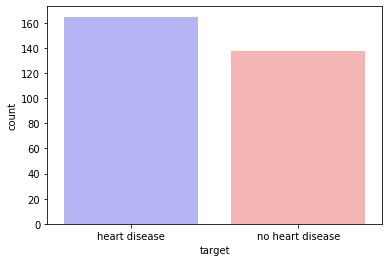

In [57]:
sns.countplot(x="target", data=df_heart, palette="bwr")
plt.show()

There is a rather even split in the dataset, there are only slightly moe patients with heart disease than those without heart disease.

What ratio of patients in the dataset are male or female? 

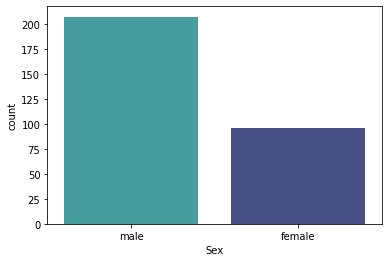

In [61]:
sns.countplot(x='sex', data=df_heart, palette="mako_r")
plt.xlabel("Sex")
plt.show()

The dataset has approximately double the amount of male patients compared to female patients.

#### Sex and heart disease

Does your sex increase your chances of having heart disease? Let's see what percentage of male and female patients have heart disease.

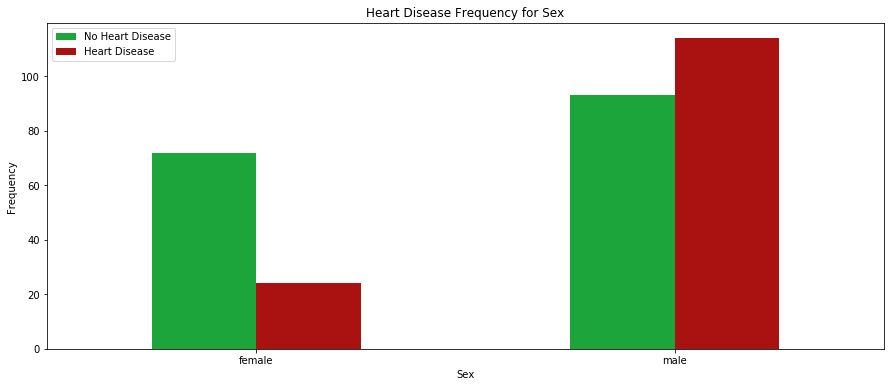

In [66]:
pd.crosstab(df_heart.sex,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

This figure clearly shows that your sex has an impact on your chances of having heart disease. Of the female patients, the vast majority do not have  heart disease. There is approximately three times the amount of females without heart disease than females with heart disease. This is strongly contrasted by the male patient group where there are more males with heart disease than males without heart disease. It can be deduced that males are more likely to develop heart disease than females. 

#### Age and heart disease

How does age affect the chances of developing heart disease?

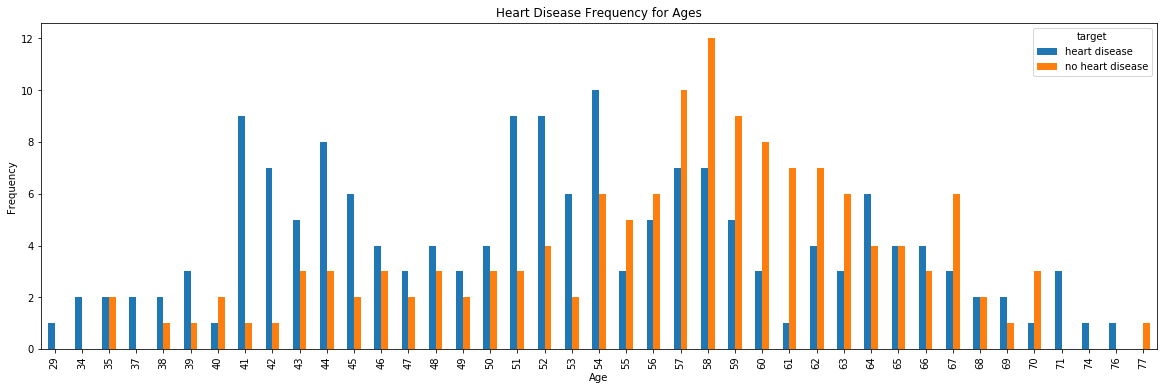

In [67]:
pd.crosstab(df_heart.age,df_heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Heart disease seems to be most prevalent between the ages of 41 and 54. People are thus most likely to develop heart disease in this age bracket. From age 55 to approximately age 63, the chances of developing heart disease decrease dramatically, with majority of patients not suffering from heart disease. This decline in heart disease could be due to patients getting other health risk factors under control after possibly having a "health scare" in their 40's or 50's, curing or lessening their heart disease. This could be things like taking medicine for high blood pressure and cholesterol, or treating other conditions linked to heart disease. In essence, the decline in heart disease could be due to better management, knowledge and treatment of heart disease or risk factors. After the age of 63, the chances of a patient having heart disease or not having heart dsease become more or less the same. Could this be due to the weakening of the heart with age? Further investigation on this is necessary to draw conclusions. 

#### Maximum heart rate achieved and heart disease

Is there a link between heart disease and the maximum heart rate a patient can achieve?

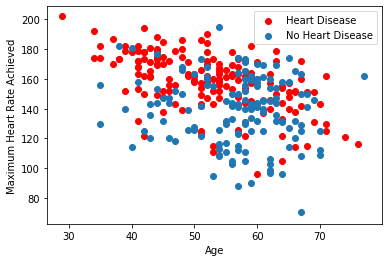

In [72]:
plt.scatter(x=df_heart.age[df_heart.target=='heart disease'], y=df_heart.max_heart_rate_achieved[(df_heart.target=='heart disease')], c="red")
plt.scatter(x=df_heart.age[df_heart.target=='no heart disease'], y=df_heart.max_heart_rate_achieved[(df_heart.target=='no heart disease')])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

The dots that represent patients with heart disease (red) seem to be the most concentrated for maximum heart rate in the range of 150 to 180 bpm. The dots represnting patients with no heart disease (blue) are generally below a maximum heart rat of 150 bpm, except for some patients between the ages of 55 and 65. To conclude, a maximum heart rate above 150 bpm could indicate increased risk of heart disease, except for patients between 55 and 65 for which this is not always the case. 

#### Slope of the peak exercise short term segment and heart disease

Is there a link between heart disease and the slope of the peak exercise short term segment?

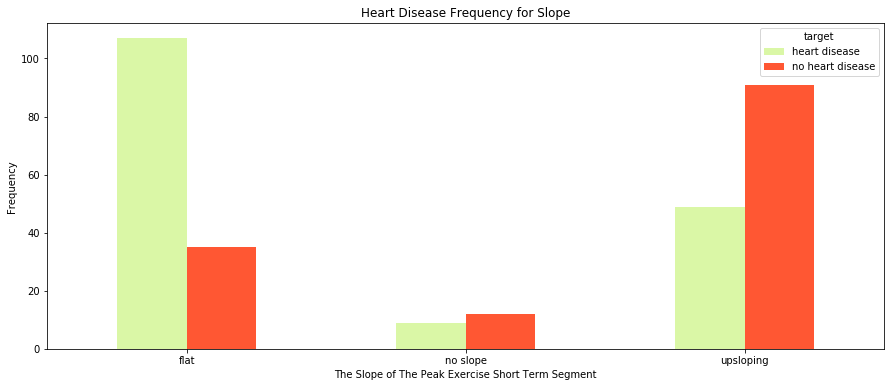

In [75]:
pd.crosstab(df_heart.st_slope,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise Short Term Segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

A clear relationship is visualised in the above graph; if the slope of the peak exercise short term segment is flat, there is a good chance that the patient does have heart disease. However, if the slope is upwardsloping, there is a good chance that the patient does not have heart disease. If there is no slope, it is unclear what the chances are of the patient having heart disease or not. We can deduce that heart disease is characterised by a flat slope of the peak exercise short term segment.

#### Fasting Blood sugar levels and heart disease

Is there a link between heart disease and fasting blood sugar levels?

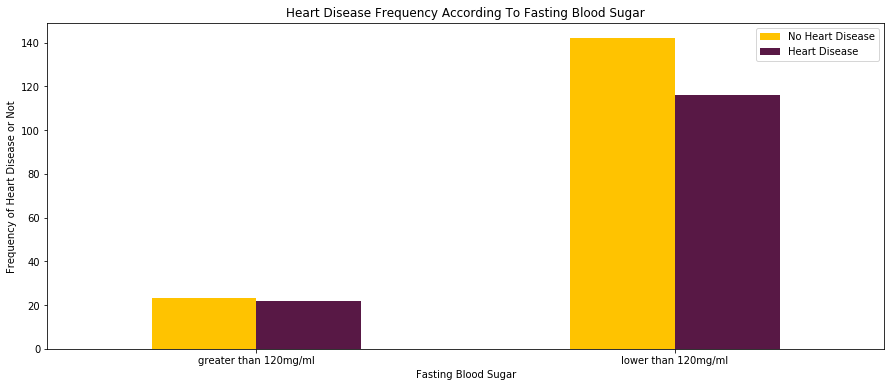

In [76]:
pd.crosstab(df_heart.fasting_blood_sugar,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(rotation = 0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

The relationship between fasting blood sugar levels and heart disease is not very clear. For blood sugar levels greater than 120 mg/ml, the likelyhood of having heart disease or not is extremely similar. For blood sugar levels lower than 120 mg/ml there is a slightly higher chance that the patient does not have heart disease. This graph does not provide evidence strong enough to draw conlcusions about the relationship between fasting blood sugar levels and heart disease, other than that the relationship is either weak or ignorable. 

#### The diffferent types of chest pain and heart disease

What is the relationship between heart disease and the different types of chest pain?

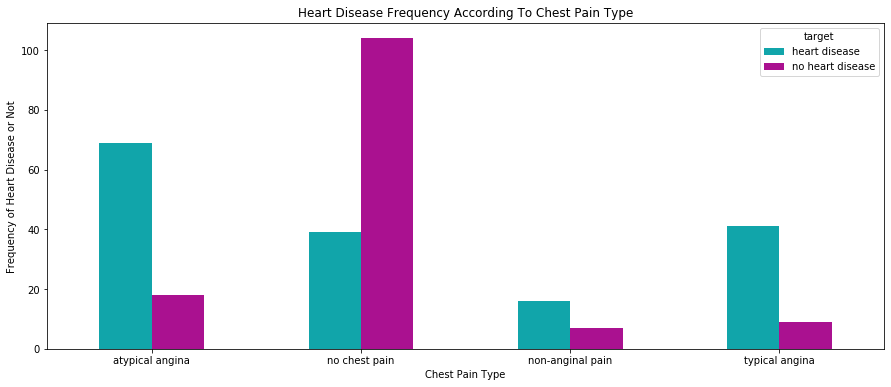

In [78]:
pd.crosstab(df_heart.chest_pain_type,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

From the graph it is clear that majority of people that do not have chest pain, do not have heart disease. There are also patients that experience no chest pain but do have heart disease (i.e. chest pain is not a prerequisite for heart disease). Only small proportion of the people that experience chest pain do not actually have heart disease. Heart disease patients most typically experience 'atypical angina' chest pain. The second most common chest pain is 'typical angina' and then the least common chest pain linked experience by  patients with heart disease is 'non-anginal' pain. We can deduce that chest pain, especially typical angina chest pain, is a common symptom of heart disease, however, heart disease can occur without the patient experiencing any type of chest pain.

#### Exercise induced chest pain and heart disease

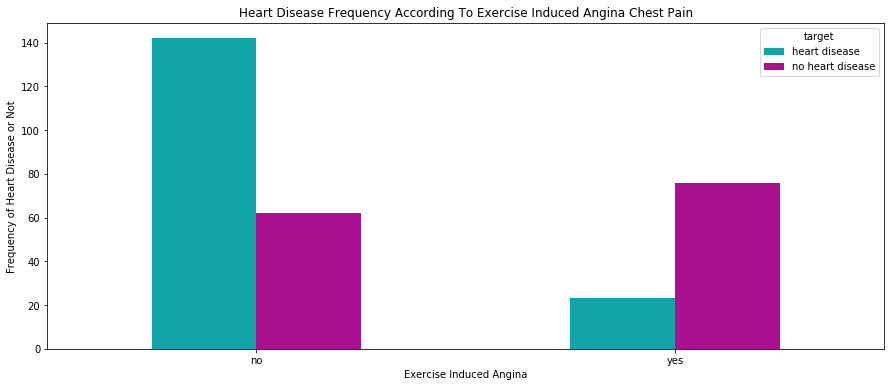

In [79]:
pd.crosstab(df_heart.exercise_induced_angina,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Exercise Induced Angina Chest Pain')
plt.xlabel('Exercise Induced Angina')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

Majority of heart disease patients do not experience exercise induced angina chest pain (i.e. most heart disease patients to not experience chest pain triggered by exercise). Only about 12.5% of heart disease patients experience chest pain induced by exercise while there is approximately 55.5% of people with no heart disease experience chest pain induced by excercise. Hence, chest pain induced by exercise is not a good indicator of heart diseases. 

#### Thalassemia and heart disease

Is there a link between heredity thalassemia (a blood disease) and heart disease?

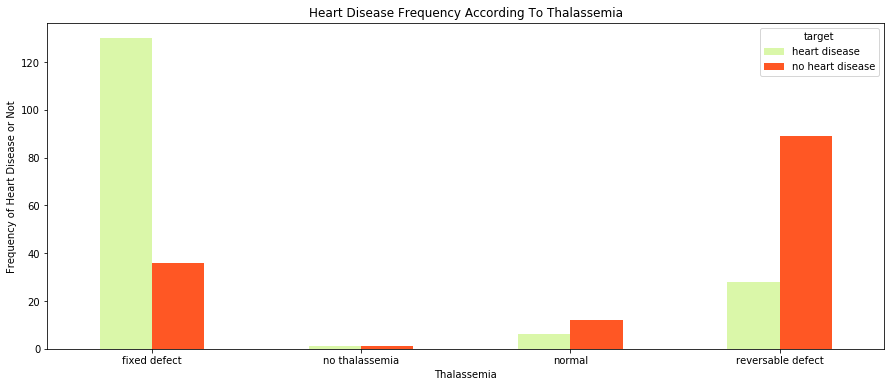

In [83]:
pd.crosstab(df_heart.thalassemia,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A9','#FF5724' ])
plt.title('Heart Disease Frequency According To Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

Most patients with heart disease have a fixed thalassemia defect, while most patients without heart disease have reversable thalassemia defects. No and normal thalassemia patients experience similar rates of heart disease. We can deduce that thalassemia sufferers with a fixed defect should be closely monitored for heart disease.

#### Number of major vessels coloured by fluorosopy and heart disease

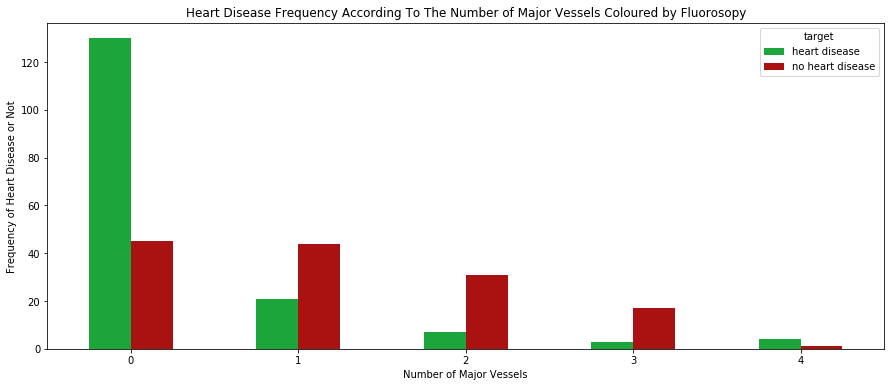

In [85]:
pd.crosstab(df_heart.num_major_vessels,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency According To The Number of Major Vessels Coloured by Fluorosopy')
plt.xlabel('Number of Major Vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

Majority of heart disease patients have zero major vessels coloured by fluorosopy. Extremely few heart disease patients have between 2 and 4 maor vessels coloured by fluorosopy. Most patients that do not have heart disease have approximately the same chances of colouring between 0 and 3 major vessels in fluorosopy, while there are more heart disease patients that colour 4 major vessels. 

#### Cholesterol and heart disease

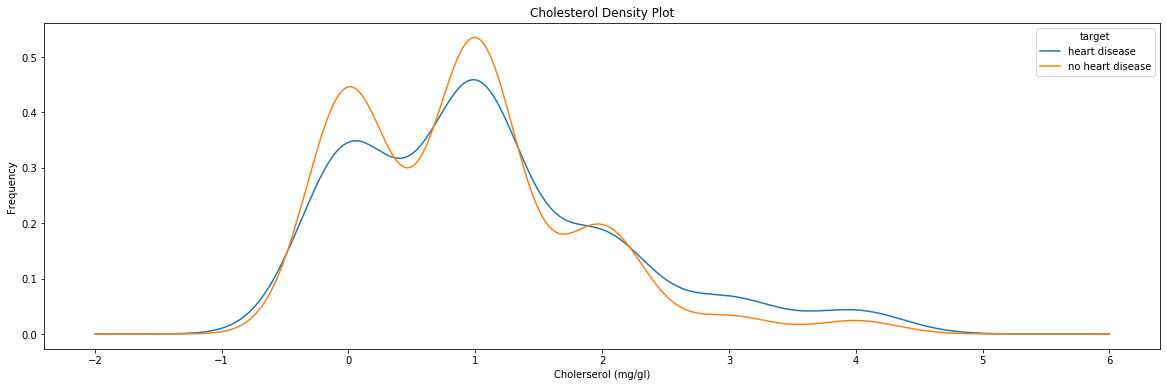

In [109]:
pd.crosstab(df_heart.cholesterol,df_heart.target).plot(kind="density",figsize=(20,6))
plt.title('Cholesterol Density Plot')
plt.xlabel('Cholerserol (mg/gl)')
plt.ylabel('Frequency')
plt.show()

Most patients that do not have heart disease have cholesterol levels between 0 mg/dl and 1 mg/dl. However, this is also the most common cholesterol level for heart disease patients. There is a better chance of a patient having heart disease if their cholesterol levels above 3 mg/dl. 

#### Blood Pressure and Heart Disease

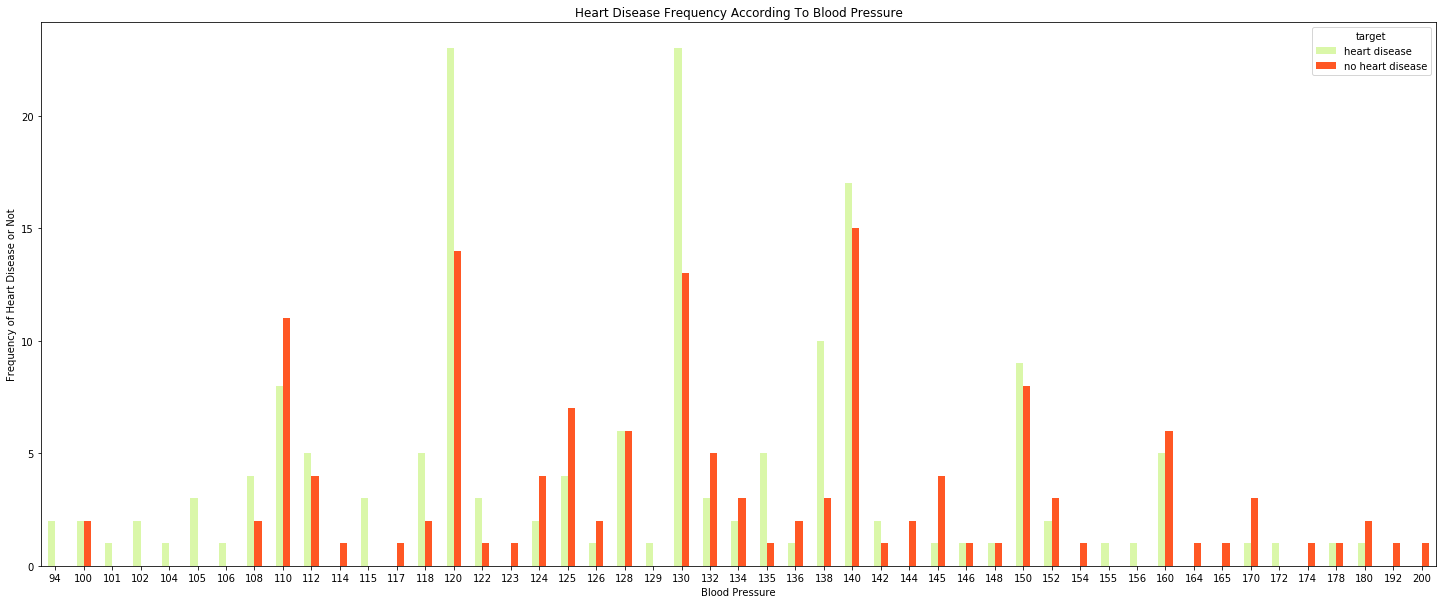

In [110]:
pd.crosstab(df_heart.resting_blood_pressure,df_heart.target).plot(kind="bar",figsize=(25,10),color=['#DAF7A9','#FF5724' ])
plt.title('Heart Disease Frequency According To Blood Pressure')
plt.xlabel('Blood Pressure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease or Not')
plt.show()

The most common blood pressures for patients without heart disease is 110, 120, 130, 140 and 150. And the most common blood pressure for patients with heart disease is 120, 130, 140 and 150. Clearly, it is difficult to distinguish who is at risk of heart disease when looking at blood pressure only.

#### Correlation

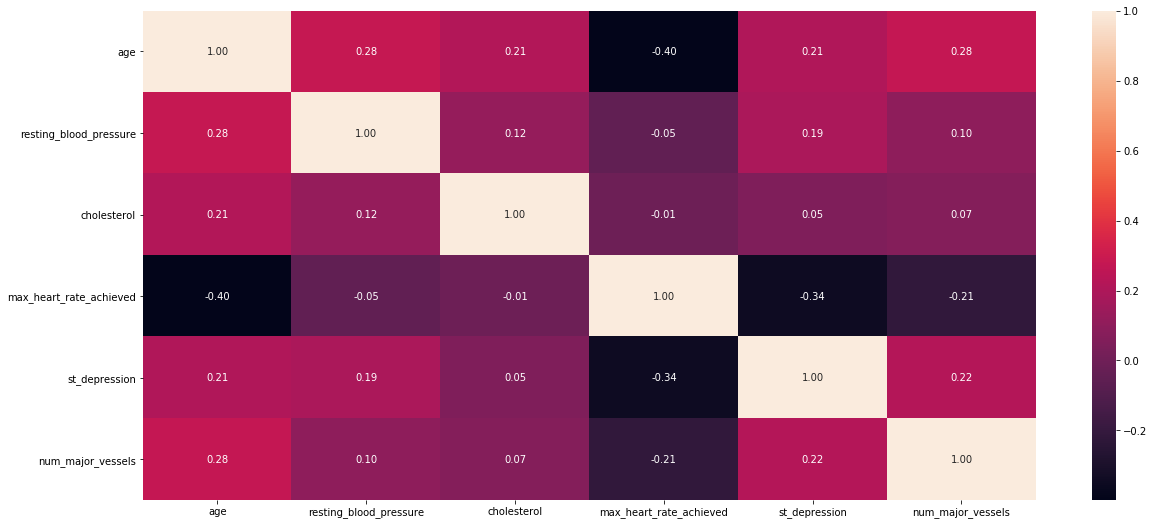

In [102]:
corr = df_heart.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

#### Attributes with a strong correlation (>0.75):
- None 

There are no numeric attributes that are strongly correlated to each other. 

#### Attributes with a moderate to weak correlation:
- max heart rate achieved and age (-0.40)
- max heart rate achieved and short term dpression induced by exercise relative to rest (-0.34)

Both of the moderate to weak correlations are negative  relationships. This means as the one increases, the other decreases. 

## Conclusion

The dataset includes informationon 303 patients, considering 14 different attributes. The dataset had no missing values or inconsistent entries, and no outliers were identified. Column names and the values of categorical data was changed to make the data easier to read and interpret. The dataset contained a rather even split between patients that do and do not have heart disease, and majority of the patients are male. 

Important relationships that were discovered are that men and patients between 41 and 54 are the most likely groups to experience heart disease. Maximum heart rates above 150 bpm could indicate increased risk of heart disease. Heart disease patients most typically experience 'atypical angina' chest pain, and do not typically experience exercise induced angina chest pain. Heart disease can be characterised by a flat slope of the peak exercise short term segment. Thalassemia sufferers with a fixed defect should be closely monitored for heart disease.
Patients have a higher chance of having heart disease if their cholesterol levels are above 3 mg/dl, and it is difficult to identify/ pick up heart disease from looking at blood pressure and cholesterol only. 

Heart disease is caused by a combination of different factors, making it tricky to treat. Because no strong correlations could be identified in this study, further investigation should be done as to what attributes are correlated with and causes heart disease, such as smoking and weight. There is much room for this study to be expanded.  
